In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('student_clustering.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [20]:
from matplotlib import pyplot as plt
%matplotlib inline

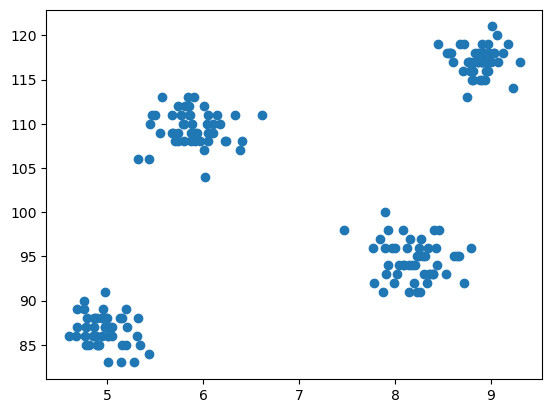

In [21]:
plt.scatter(df['cgpa'],df['iq'])

In [22]:
from sklearn.cluster import KMeans

In [23]:
wcss = []

for i in range (1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

C:\Users\Deepak\ana-conda-3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [24]:
wcss

[29957.898287999997,
 4184.14127,
 2364.005583420083,
 681.96966,
 556.6603823704864,
 388.8524026875981,
 295.4391895943192,
 249.63018358945305,
 203.82503394280948,
 171.405907521685]

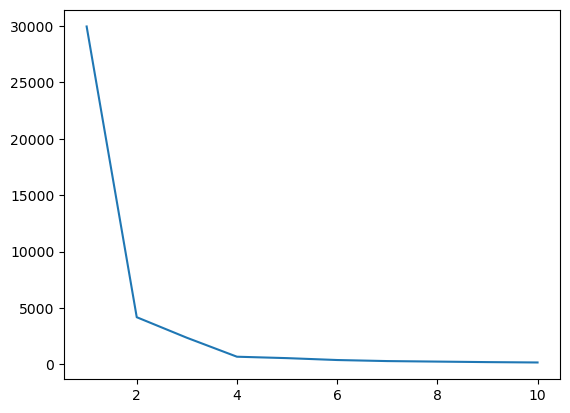

In [25]:
plt.plot(range(1,11),wcss)

In [26]:
x = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(x)

In [27]:
y_means

array([1, 2, 3, 3, 2, 2, 3, 0, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 1, 0, 3, 2, 0, 2, 0, 2, 3, 3, 0, 2, 1, 2, 1, 3, 3, 1,
       0, 0, 3, 2, 0, 2, 1, 1, 0, 3, 0, 2, 2, 0, 2, 0, 2, 3, 3, 0, 1, 0,
       3, 1, 2, 3, 2, 0, 3, 1, 2, 0, 2, 0, 1, 3, 3, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 0, 0, 3, 1, 3, 3, 0, 3, 1, 0, 2, 1, 1, 0, 1, 1, 3, 1, 0, 0,
       3, 0, 2, 2, 3, 0, 3, 2, 0, 1, 1, 2, 3, 0, 3, 1, 3, 2, 1, 3, 3, 2,
       1, 1, 2, 0, 2, 1, 3, 3, 3, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 3, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 3,
       0, 2, 1, 0, 0, 2, 2, 2, 3, 1, 3, 3, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2,
       2, 0])

In [28]:
x[y_means ==3,1]

array([ 93.,  97.,  98.,  94.,  97.,  95.,  91.,  98.,  92.,  98.,  94.,
        96.,  96.,  96.,  93.,  94.,  96.,  96.,  95.,  93.,  95.,  94.,
        92.,  91.,  92.,  95.,  94.,  95.,  92.,  94.,  91.,  95.,  93.,
        97.,  98.,  96.,  93., 100.,  96.,  94.,  95.,  93.,  92.,  98.,
        96.,  93.,  91.,  93.,  94.,  96.])

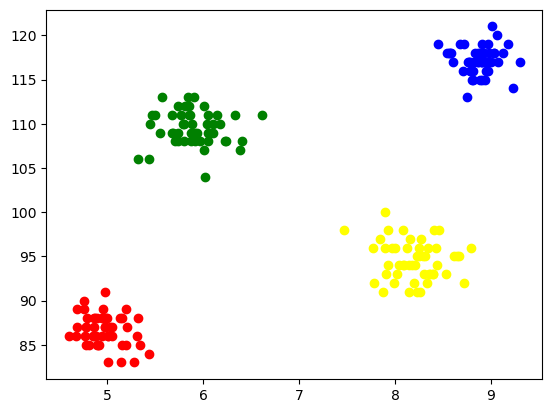

In [29]:
plt.scatter(x[y_means == 0,0],x[y_means == 0,1],color='blue')
plt.scatter(x[y_means == 1,0],x[y_means == 1,1],color='red')
plt.scatter(x[y_means == 2,0],x[y_means == 2,1],color='green')
plt.scatter(x[y_means == 3,0],x[y_means == 3,1],color='yellow')

In [30]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

x,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [31]:
x

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [32]:
!pip install plotly.express

In [33]:
import plotly.express as px
fig = px.scatter_3d(x=x[:,0],y=x[:,1],z=x[:,2])
fig.show()